# Project 4: West Nile Virus - Modelling

---
# Table of Contents

1. Import libraries
2. Import data
3. TBC
4. TBC
---


# Import libraries

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier,\
GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, recall_score, precision_score, \
roc_auc_score, plot_roc_curve, roc_curve, plot_confusion_matrix, accuracy_score,\
f1_score,ConfusionMatrixDisplay, RocCurveDisplay

# Import data

In [2]:
# import training dataset
train = pd.read_csv('../output_data/merged_train.csv')

# data cleaning
train.set_index('date', inplace=True)
train.drop(columns='nummosquitos', inplace=True)

# check the df columns
print(f'Features in training set : {train.columns.tolist()}')

Features in training set : ['species', 'latitude', 'longitude', 'wnvpresent', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal', 'temp_fluct', 'daylight', 'relative_hum']


In [3]:
# define feature matrix and target vector
X = train.drop(columns='wnvpresent')
y = train['wnvpresent']

# Preprocessing 
## Train-validation  split

In [4]:
# split dataset into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  random_state=42,
                                                  stratify=y)

In [13]:
# check the shape of training and testing vectors
print(" Train Set Shape ".center(27, '='))
print(f'Features X_train: {X_train.shape}')
print(f'Targets y_train:  {y_train.shape}')
print()
print(" Validation Set Shape ".center(26, '='))
print(f'Features X_val:   {X_val.shape}')
print(f'Targets y_val:    {y_val.shape}')

===== Train Set Shape =====
Features X_train: (7879, 15)
Targets y_train:  (7879,)

== Validation Set Shape ==
Features X_val:   (2627, 15)
Targets y_val:    (2627,)


## Features transformation 

In [14]:
# instantiate transformers 
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
sc = StandardScaler()


# instantiate transformers into column transformer 
ct = make_column_transformer(
    (sc, make_column_selector(dtype_include='number')),
    (ohe, make_column_selector(dtype_exclude='number')),
    remainder='passthrough', 
    verbose_feature_names_out=False
)

# transform feature matrix
X_train = pd.DataFrame(ct.fit_transform(X_train), 
                       columns=ct.get_feature_names_out())

X_val = pd.DataFrame(ct.transform(X_val), 
                       columns=ct.get_feature_names_out())

# check X matrix after transformation
X_train.head()

,latitude,longitude,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,temp_fluct,daylight,relative_hum,species_ERRATICUS,species_PIPIENS,species_PIPIENS/RESTUANS,species_RESTUANS,species_SALINARIUS,species_TARSALIS,species_TERRITANS
0,-0.863790,-0.329696,0.435022,-0.552766,-0.002088,0.350149,-0.412475,-0.198591,-0.328471,-0.157190,...,1.483017,-1.008347,-0.811214,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.515998,-0.176909,0.495685,0.048510,0.266496,1.120683,-0.092320,0.025375,-0.328471,0.193288,...,0.714862,-1.262680,-0.690378,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.661906,1.428458,-2.962122,-2.356596,-2.822215,-1.653240,-2.333406,-2.662212,4.515917,-1.559102,...,-1.301544,-2.105158,0.402667,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.013760,1.193503,0.980991,0.783404,0.937954,0.966576,1.380393,1.219858,-0.328471,1.069483,...,0.426804,-0.372515,1.018749,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.188928,0.531668,0.374358,0.716595,0.535079,0.041935,1.124269,0.921237,-0.328471,0.543766,...,-0.437370,0.819670,1.269894,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# check the df cloumns
print(f'Features in X matrix: {X_train.columns.tolist()}')

Features in X matrix: ['latitude', 'longitude', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal', 'temp_fluct', 'daylight', 'relative_hum', 'species_ERRATICUS', 'species_PIPIENS', 'species_PIPIENS/RESTUANS', 'species_RESTUANS', 'species_SALINARIUS', 'species_TARSALIS', 'species_TERRITANS']


In [16]:
# check the shape of training and testing vectors
print(" Train Set Shape ".center(27, '='))
print(f'Features X_train: {X_train.shape}')
print(f'Targets y_train:  {y_train.shape}')
print()
print(" Validation Set Shape ".center(26, '='))
print(f'Features X_val:   {X_val.shape}')
print(f'Targets y_val:    {y_val.shape}')

===== Train Set Shape =====
Features X_train: (7879, 21)
Targets y_train:  (7879,)

== Validation Set Shape ==
Features X_val:   (2627, 21)
Targets y_val:    (2627,)


# Modelling
## Functions used

In [42]:
def fit_gs(clf, params):
    """fits a GridSearchCV to a classifier, prints best params and returns model"""
    
    gs = GridSearchCV(clf, params, cv=5, n_jobs=-1, scoring= "roc_auc")
    gs.fit(X_train, y_train)
    
    print(f"Best Parameters: {gs.best_params_}")
    
    return gs

In [138]:
def eval_model(model):
    """returns dataframe of evaluation metrics for classifier"""
    
    # get predictions
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:,1]
        
    # metrics for evaluating classifier
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    
    accuracy = (tn + fn) / (tn + fp + fn + tp)
    
    if (tn + fp) != 0:
        spec = tn / (tn + fp)
    else:
        spec = 'NA'
        
    if (tp + fn) != 0:
        recall = tp / (tp + fn)
    else:
        recall = np.nan

    if (tp + fp) != 0:
        precision = tp / (tp + fp)
    else:
        precision = np.nan
        
    if recall == np.nan or precision == np.nan:
        f1 = np.nan
    else:
        f1 = 2*((precision*recall)/(precision+recall))

    roc = roc_auc_score(y_val, y_proba)
    
    try:
        model_name = str(model.estimator)[:-2]
        if len(model_name) > 30:
            model_name = model_name[:13]
    except:
        model_name = 'Dummy'
        
    df = pd.DataFrame([np.round([accuracy, spec, recall, precision, f1, fp, fn, roc], 3)], 
                      columns = ["Accuracy", 
                                 "Specificity", 
                                 "Recall", 
                                 "Precision", 
                                 "F1", 
                                 "False Positives", 
                                 "False Negatives", 
                                 "ROC-AUC"], 
                      index = [model_name],
                      dtype='str')
    return df

## (0) Dummy model

In [114]:
# fit dummy model
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

dummy_result = eval_model(dummy)
dummy_result

,Accuracy,Specificity,Recall,Precision,F1,False Positives,False Negatives,ROC-AUC
Dummy,1.0,1.0,0.0,NaN,NaN,0.0,138.0,0.5


## (1) Random forest classifier

In [79]:
rfc_params = {"n_estimators": [10, 50, 100, 250], 
              "max_depth": [5, 10, 20],
              "class_weight": [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}],
              "random_state": [42]
             }
rfc = fit_gs(RandomForestClassifier(), rfc_params)

Best Parameters: {'class_weight': {0: 1, 1: 10}, 'max_depth': 10, 'n_estimators': 100, 'random_state': 42}


In [113]:
rfc_result = eval_model(rfc)
rfc_result

,Accuracy,Specificity,Recall,Precision,F1,False Positives,False Negatives,ROC-AUC
RandomForestClassifier,0.884,0.903,0.449,0.204,0.281,242.0,76.0,0.824


## (2) Support vector classifier

In [81]:
svc_params = {"C": [10**-2, 10**-1, 10**0, 10**1, 10**2],
              "class_weight": [None, {0:1,1:10}, {0:1,1:25}],
              "probability": [True],
              "random_state": [42]
             }
svc = fit_gs(SVC(), svc_params)

Best Parameters: {'C': 1, 'class_weight': {0: 1, 1: 10}, 'probability': True, 'random_state': 42}


In [115]:
svc_result = eval_model(svc)
svc_result

,Accuracy,Specificity,Recall,Precision,F1,False Positives,False Negatives,ROC-AUC
SVC,0.808,0.832,0.616,0.169,0.265,419.0,53.0,0.812


## (3) Logistic regression

In [143]:
lr_params = {"C": [10**-2, 10**-1, 10**0, 10**1, 10**2],
             "penalty": ['l1', 'l2'],
             "max_iter": [20, 50, 100, 200],
             "class_weight": [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}],
             "solver": ['liblinear'],
             "random_state": [42]
            }

lr = fit_gs(LogisticRegression(), lr_params)

Best Parameters: {'C': 1, 'class_weight': {0: 1, 1: 5}, 'max_iter': 50, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}


In [116]:
lr_result = eval_model(lr)
lr_result

,Accuracy,Specificity,Recall,Precision,F1,False Positives,False Negatives,ROC-AUC
LogisticRegression,0.953,0.961,0.188,0.211,0.199,97.0,112.0,0.792


## (4) K-nearest neighbour

In [160]:
knn_params = {"n_neighbors": [5,35,65,95]}

knn = fit_gs(KNeighborsClassifier(), knn_params)

Best Parameters: {'n_neighbors': 65}


In [161]:
knn_result = eval_model(knn)
knn_result

,Accuracy,Specificity,Recall,Precision,F1,False Positives,False Negatives,ROC-AUC
KNeighborsClassifier,1.0,1.0,0.0,NaN,NaN,0.0,138.0,0.781


## (5) Gradient boosting classifier

In [172]:
gbc_params = {"n_estimators": [150, 200, 250],
              "max_depth": [3, 5],
              "random_state": [42]
             }
gbc = fit_gs(GradientBoostingClassifier(), gbc_params)

Best Parameters: {'max_depth': 3, 'n_estimators': 200, 'random_state': 42}


In [173]:
gbc_result = eval_model(gbc)
gbc_result

,Accuracy,Specificity,Recall,Precision,F1,False Positives,False Negatives,ROC-AUC
GradientBoostingClassifier,0.994,0.997,0.065,0.562,0.117,7.0,129.0,0.833


## (6) XGB classifier

In [133]:
xgb_params = {"use_label_encoder": [False],
              "objective": ["binary:logistic"],
              "eval_metric": ['auc'],
              "learning_rate":[0.1, 0.2, 0.5],
              "max_depth": [5,8],
              "max_leaf_nodes": [None,], #tune params
              "gamma": np.linspace(5, 100, 8),
              "reg_alpha": np.linspace(0.0001, 1, 8),
              "reg_lambda": np.linspace(5, 100, 5)} #tune params

xgb = fit_gs(XGBClassifier(random_state = 42), xgb_params)

Best Parameters: {'eval_metric': 'auc', 'gamma': 5.0, 'learning_rate': 0.5, 'max_depth': 8, 'max_leaf_nodes': None, 'objective': 'binary:logistic', 'reg_alpha': 0.0001, 'reg_lambda': 5.0, 'use_label_encoder': False}


In [140]:
xgb_result = eval_model(xgb)
xgb_result

,Accuracy,Specificity,Recall,Precision,F1,False Positives,False Negatives,ROC-AUC
XGBClassifier,0.997,0.999,0.036,0.625,0.068,3.0,133.0,0.828


## (7) Extra trees classifier

In [150]:
et_params = {"max_depth": [3,5,10,20],
             "min_samples_leaf": [1, 3, 10, 20],
             "max_leaf_nodes": [None, 5, 10],
             "random_state": [42]
            }
et = fit_gs(ExtraTreesClassifier(), et_params)

Best Parameters: {'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'random_state': 42}


In [151]:
et_result = eval_model(et)
et_result

,Accuracy,Specificity,Recall,Precision,F1,False Positives,False Negatives,ROC-AUC
ExtraTreesClassifier,1.0,1.0,0.0,NaN,NaN,0.0,138.0,0.807


## Summary of results for all models

In [141]:
summary = pd.concat([dummy_result, rfc_result, svc_result, lr_result, knn_result, gbc_result, xgb_result, 
                    et_result]) 
summary

,Accuracy,Specificity,Recall,Precision,F1,False Positives,False Negatives,ROC-AUC
Dummy,1.0,1.0,0.0,NaN,NaN,0.0,138.0,0.5
RandomForestClassifier,0.884,0.903,0.449,0.204,0.281,242.0,76.0,0.824
SVC,0.808,0.832,0.616,0.169,0.265,419.0,53.0,0.812
LogisticRegression,0.953,0.961,0.188,0.211,0.199,97.0,112.0,0.792
KNeighborsClassifier,1.0,1.0,0.0,NaN,NaN,0.0,138.0,0.779
GradientBoostingClassifier,0.993,0.996,0.065,0.474,0.115,10.0,129.0,0.83
XGBClassifier,0.997,0.999,0.036,0.625,0.068,3.0,133.0,0.828
ExtraTreesClassifier,1.0,1.0,0.0,NaN,NaN,0.0,138.0,0.807


## ROC plot

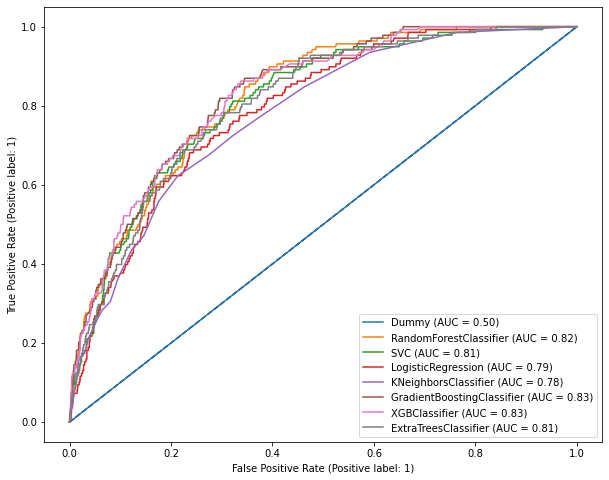

In [142]:
models = [dummy, rfc, svc, lr, knn, gbc, xgb, et]

fig, ax = plt.subplots(figsize=(10,8))
plt.plot([0, 1], [0, 1], "k--")
for i, model in enumerate(models):
    RocCurveDisplay.from_estimator(model,
                                   X_val,
                                   y_val,
                                   ax=ax,
                                   name=f'{summary.index[i]}')

## Important features

In [218]:
def get_impt_features(models):
    result = pd.DataFrame()
    for i, model in enumerate(models):
        try:
            importances = model.best_estimator_.feature_importances_
            df = pd.DataFrame(zip(X_train.columns,importances), 
                              columns=[f'{summary.index[i]}','importance']).\
                sort_values('importance', ascending=False).reset_index(drop=True)
            result = pd.concat([result,df], axis = 1)
            
        except:
            pass
        
        try:
            coef = model.best_estimator_.coef_
            df = pd.DataFrame([X_train.columns,(*coef)]).T. \
                rename(columns={0:f'{summary.index[i]}', 1:'coefficient'}). \
                sort_values('coefficient', ascending=False, key=abs).reset_index(drop=True)
            result = pd.concat([result,df], axis = 1)

        except:
            pass
        
    return result

In [219]:
get_impt_features(models)

,RandomForestClassifier,importance,LogisticRegression,coefficient,GradientBoostingClassifier,importance,XGBClassifier,importance,ExtraTreesClassifier,importance
0,daylight,0.182322,depart,-3.138318,daylight,0.255405,daylight,0.144811,daylight,0.168092
1,longitude,0.170955,species_TERRITANS,-2.912889,longitude,0.201149,tavg,0.109754,longitude,0.078802
2,latitude,0.132647,daylight,-2.445088,latitude,0.148736,temp_fluct,0.089667,species_PIPIENS,0.075233
3,tavg,0.067102,species_SALINARIUS,-1.800168,temp_fluct,0.073985,wetbulb,0.067421,temp_fluct,0.063856
4,tmax,0.050310,tmax,1.627074,relative_hum,0.049398,longitude,0.066634,cool,0.062549
5,temp_fluct,0.048911,tmin,1.368925,species_PIPIENS,0.041218,tmax,0.066174,relative_hum,0.062089
6,relative_hum,0.044527,species_PIPIENS,1.170879,species_PIPIENS/RESTUANS,0.037522,species_RESTUANS,0.062233,tmax,0.055223
7,cool,0.041424,dewpoint,1.008592,tmin,0.035549,species_PIPIENS,0.059967,species_RESTUANS,0.054647
8,wetbulb,0.039966,species_PIPIENS/RESTUANS,0.863588,depart,0.026629,preciptotal,0.051651,tavg,0.051265
9,tmin,0.038181,longitude,-0.429861,tmax,0.025471,dewpoint,0.050874,depart,0.050879
